# Project 2a - Projectile Motion
## Due February 2nd

### Basic Newtonian motion
Among the simplest dynamical systems that one can consider that is still substantially non-trivial is that of projectile motion.  We'll begin by considering simple one-dimensional motion, in which an object under the influence of gravity travels straight up and straight down.  We seek its position as a function of time, $z(t)$.  Additionally, we begin with perfect knowledge of the position of the object at time $t=0$, such that $z(0)=z_0$, and also perfect knowledge of its velocity $v(t)$ at time $t=0$, $v(0)=v_0$.    

Newton's first law tells us that
$$
F = ma,
$$
with $F$ the force, $m$ the mass, and $a$ the acceleration of the object.  A reasonable approximation to the gravitational force while on earth's surface is 
$$
F_g = mg,
$$
with $g$ the gravitational constant of $g=-9.81$ms$^{-1}$.  As such, after some simplification, we have that 
$$
a = g.
$$
The acceleration is the time-derivative of velocity, and velocity is the time-derivative of position, which gives us the system of equations
$$
\frac{\partial z}{\partial t} = v(t)
$$
$$
\frac{\partial v}{\partial t} = g.
$$
We can solve this system easily with elementary integration.  Beginning with the second, we have that
$$
v(t) = g t + v_0
$$
$$
z(t) = \frac{1}{2} g t^2 + v_0 t + z_0
$$
Let's code up some example trajectories.  The most interesting ones occur when $v_0$ is positive.  **Modify the code below such that the final time occurs exactly when the object hits the ground (i.e. $t_f$ such $z(t_f) = z_0$).



Text(0, 0.5, 'v(t)')

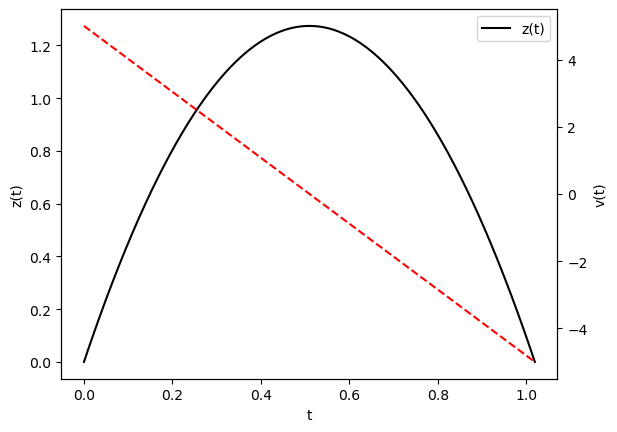

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z0 = 0    # Initial position of the particle
v0 = 5.0    # Initial velocity of the particle (positive is up)
g = -9.81   # Gravitational acceleration
groundTime = (-v0-np.sqrt(v0**2-2*g*z0))/g
handTime = -2*v0/g

t = np.linspace(0,groundTime,10001)       # times to evaluate at
v = v0 + g*t
z = z0 + v0*t + 0.5*g*t**2       # solution for position

fig,ax = plt.subplots()
ax.plot(t,z,'k-',label='z(t)')
ax.set_xlabel('t')
ax.set_ylabel('z(t)')
ax.legend()
ax2 = ax.twinx()
ax2.plot(t,v,'r--',label='v(t)')
ax2.set_ylabel('v(t)')

### Newton breaks down
Unfortunately, analytical solution techniques such as the one used above are only plausible for the vast minority of physical systems.  For example, consider the case just like the previous one, but in which atmospheric drag operates on the particle in opposition to its velocity.  One such common model is
$$
F = m g - c v^2 \frac{v}{|v|},
$$
where the lattermost fraction ensures that the drag force is in the opposite direction to velocity.  This leads to the system of equations
$$
\frac{\partial z}{\partial t} = v(t)
$$
$$
\frac{\partial v}{\partial t} = g - \frac{c}{m} v^2 \frac{v}{|v|} .
$$
This equation is non-linear and non-separable, and it has no solution that can be expressed in terms of elementary functions (polynomials, cosines, etc.).  How can we solve this?  The answer is to relax the definition of the derivative, such that we are working with finite quanities.  Specifically, we can make the approximation
$$
\frac{\partial v}{\partial t} \approx \frac{v_{k+1} - v_k}{\Delta t}.
$$
(A similar approximation can be made for the position).  Indeed, we can transform the velocity equation into something that we can evaluate by evaluating the right hand side $f(v,t) = g - \frac{c}{m} v^2 \frac{v}{|v|}$ at some discrete time.  A common choice referred to as *Euler's method* is 
$$
\frac{v_{k+1} - v_k}{\Delta t} = f(v_k,t_k).
$$
Note that we can assume that we already know $v_k$, either because $k=0$ or because we have iteratively solved the above expression for $v_k$.  As a result, we can very easily solve for $v_{k+1}$
$$
v_{k+1} = v_k + \Delta t \left(g - \frac{c}{m} v_k^2 \frac{v_k}{|v_k|}\right).
$$
Simultaneously, we also have that
$$
z_{k+1} = z_k + \Delta t v_k.
$$
Taken together, we can simplify the system of equations into a single one vector-valued equation by writing 
$$
\mathbf{u}_{k+1} = \mathbf{u}_k + \Delta t \mathcal{F}(\mathbf{u}_k,t_k),
$$
with $\mathbf{u}_k = [v_k,z_k]^T$ and 
$$
\mathcal{F}(\mathbf{u}_k,t_k) = [g - \frac{c}{m} v_k^2 \frac{v_k}{|v_k|},v_k]^T
$$
(note that the superscript T means transpose, and this is there because we like working with column-vectors.  Also note the distinction between the calligraphic $\mathcal{F}$, which represents the right hand side of the equation, and $F$, which is the force).

**Implement Euler's method and approximately solve for the trajectory of the particle under different assumptions about $c/m$.**  For example, you might try launching a tissue paper at high velocity.  **Also, construct a simulation where you verify that the terminal velocity agrees with the algebraically derived value obtained by setting $\frac{\partial v}{\partial t} = 0$.**

Text(0, 0.5, 'v(t)')

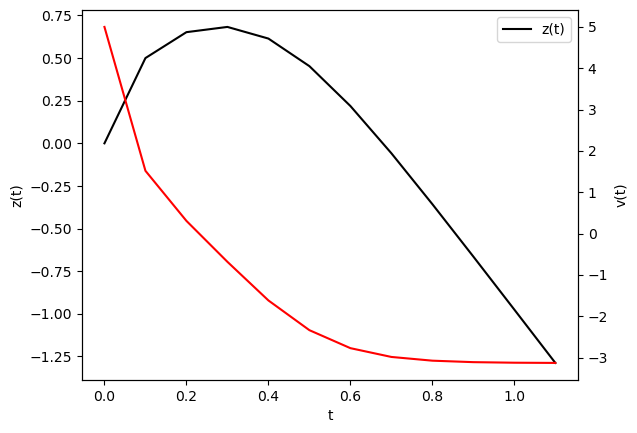

In [36]:
z0 = 0.0     # Initial position
v0 = 5.0     # Initial velocity

g = -9.81    # Gravitational acceleration
m = 1.0      # Mass
c = 1.0      # Drag coefficient


dt = 0.1    # Time step 

u_0 = np.array([v0,z0])

# right hand side
def F(t,u_t):
    v_t = u_t[0]
    x_t = u_t[1]
    return np.array([g - c/m*v_t**2*np.sign(v_t), v_t])

# Initial and final times
t = 0   
t_end = 1.0

# Record the solution through time
u_t = np.copy(u_0)
u_record = [u_0]
t_record = [0.0]

# Perform time-stepping
while t<t_end:
    # Update solution
    u_next = u_t + dt*F(t,u_t)
    u_t = u_next
    
    # Update time
    t+=dt
    
    # Store solutions
    u_record.append(np.copy(u_next))
    t_record.append(t)

# Convert lists to arrays
u_record = np.array(u_record)
t_record = np.array(t_record)


fig,ax = plt.subplots()
ax.plot(t_record,u_record[:,1],'k-',label='z(t)')
ax.set_xlabel('t')
ax.set_ylabel('z(t)')
ax.legend()
ax2 = ax.twinx()
ax2.plot(t_record,u_record[:,0],'r-',label='v(t)')
ax2.set_ylabel('v(t)')



### Accuracy assessment
The above code produces *an* answer.  But is it the right answer?  Recall that we made an approximation to the derivative, where we through away the assumption of infinitesimally small steps in favor of finite ones.  What are the implications of this choice?  It's difficult to know for problems where there is no analytical solution such as the one we just solved.  However, recall that for the case when $c=0$, we do have an analytical solution that we compare our *numerical solution* to, the parabolic solution that we found in the first part.

#### Qualitative Assessment
**For time steps, $\Delta t\in[10^{-2},\ldots,10^{0}]$, plot the particle trajectory computed using Euler's method against the true solution derived in the first part of this notebook.  Does the error get worse or better with increasing $\Delta t$?  Is there a distinction in the error in the computed velocity versus the computed position?  Why?**

### Answer:
The error in the velocity is basically 0 for all time steps sizes. The error in position seems to be proportional to the time step. This is because the velocity is constant while the position is calculated based on previous positions and the velocity.

In [32]:
z0 = 0.0     # Initial position
v0 = 5.0     # Initial velocity
dt = 0.1     # Time step 
u_0 = np.array([v0,z0])

# Initial and final times
t0 = 0   
t_end = 1.0

In [34]:
# right hand side
t=0
def F(t,u_t):
    v_t = u_t[0]
    return np.array([g, v_t])

# Record the solution through time
u_t = np.copy(u_0)
u_record = [u_0]
t_record = [0.0]
v_record = []
z_record = []

# Perform time-stepping
while t<t_end:
    # Update solution
    u_next = u_t + dt*F(t,u_t)
    u_t = u_next
    # Update time
    t+=dt
    # Store solutions
    u_record.append(np.copy(u_next))
    t_record.append(t)

for t in t_record:
    # Update solution
    v = v0 + g*t
    z = z0 + v0*t + 0.5*g*t**2 
    # Store solutions
    v_record.append(v)
    z_record.append(z)
    
    
# Convert lists to arrays
u_record = np.array(u_record)
t_record = np.array(t_record)
v_record = np.array(v_record)
z_record = np.array(z_record)


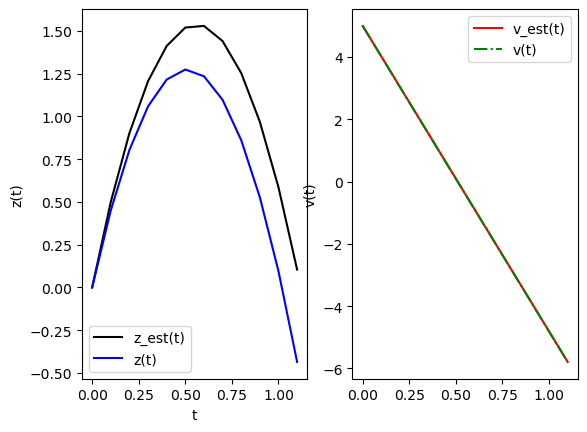

In [35]:
fig,ax = plt.subplots(1,2)
ax[0].plot(t_record,u_record[:,1],'k-',label='z_est(t)')
ax[0].set_xlabel('t')
ax[0].set_ylabel('z(t)')
ax[1].plot(t_record,u_record[:,0],'r-',label='v_est(t)')
ax[1].set_ylabel('v(t)')
ax[1].plot(t_record,v_record,'g-.',label='v(t)')
ax[0].plot(t_record,z_record,'b-',label='z(t)')
ax[0].legend()
ax[1].legend()

In [11]:
pos_error = []
vel_error = []
for i in range(len(t_record)):
    pos_error.append(u_record[i,1]-z_record[i])
    vel_error.append(u_record[i,0]-v_record[i])
    
pos_error = np.array(pos_error)
vel_error = np.array(vel_error)


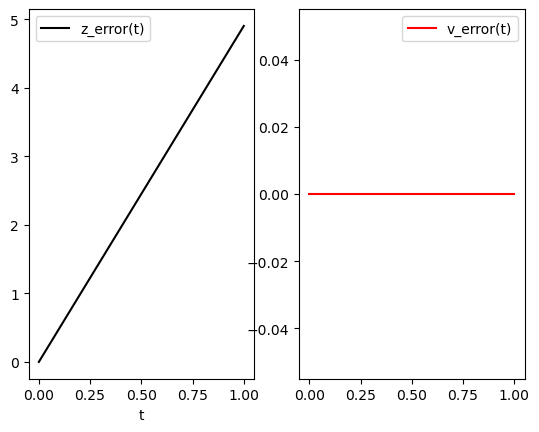

In [12]:
fig,ax = plt.subplots(1,2)
ax[0].plot(t_record,pos_error,'k-',label='z_error(t)')
ax[0].set_xlabel('t')
ax[1].plot(t_record,vel_error,'r-',label='v_error(t)')
ax[0].legend()
ax[1].legend()

#### Quantitative Assessment
**For time steps, $\Delta t\in[10^{-5},\ldots,10^{0}]$, take exactly one step with Euler's method and compute the difference between the true position and the computed position of the particle at that time.  Create a log-log plot (try matplotlib.pyplot.loglog) with $\Delta t$ on the horizontal axis and the computed error on the vertical axis.  What is the approximate slope of this line?**



Text(0, 0.5, 'Error')

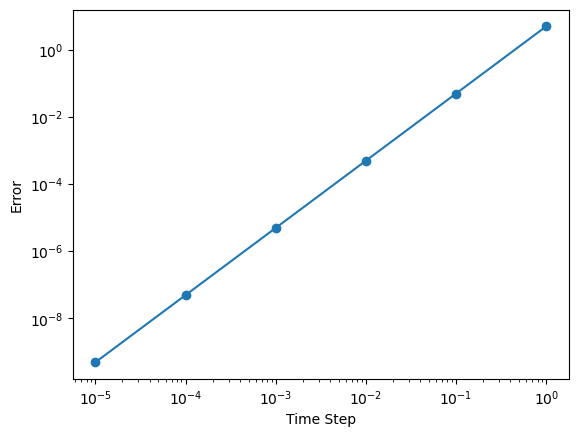

In [28]:
z0 = 0.0    
v0 = 5.0 
delta_t = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0])
pos_errors = []

for step in delta_t:
    pos_errors.append(-0.5*g*step**2)
    
pos_errors = np.array(pos_errors)

plt.loglog(delta_t,pos_errors, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Error')

## Slope:
Approx = 2

Implies that the error increases by the square of the timestep size

### Extension to 2D
Of course, projectiles don't always just go straight up and down: it's often the case that we wish to have lateral motion.  Newton's laws still hold in this case
$$
\mathbf{F} = m \mathbf{a}
$$
where now both force and acceleration are 2D vectors rather than scalars.  In the absence of drag, $\mathbf{F} = \mathbf{F}_g = [0,mg]^T$, assuming the horizontal coordinate comes first.  Assuming once again that we have known initial position $\mathbf{x}(0) = \mathbf{x}_0$ and velocity $\mathbf{v}(0) = \mathbf{v}_0$, then there is an analytical solution that proceeds much like before
$$
\mathbf{x}(t) = \frac{1}{2}\frac{\mathbf{F}}{m} t^2 + \mathbf{v}_0 t + \mathbf{x}_0
$$
$$
\mathbf{v}(t) = \frac{\mathbf{F}}{m} t + \mathbf{v}_0.
$$
Note that we use the notation $\mathbf{x} = [x,z]^T$ and $\mathbf{v} = [v_x,v_z]^T$ to represent the 2D vectors of position and velocity.


(-0.25, 5.25, -0.0636875, 1.3374374999999998)

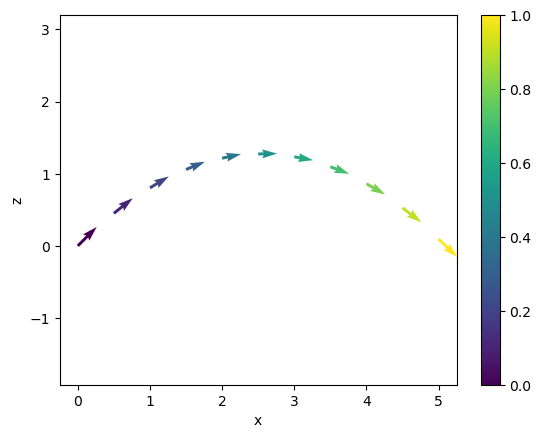

In [29]:
m = 1
g = -9.81
x0 = np.array([[0,0]]).T
v0 = np.array([[5.0,5.0]]).T
F = np.array([[0,m*g]]).T

t = np.linspace(0,1,11)
x = (0.5*F/m*t**2 + v0*t + x0).T
v = (F/m*t + v0).T

fig,ax = plt.subplots()
c = ax.quiver(x[:,0],x[:,1],v[:,0],v[:,1],t)
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.colorbar(c)
plt.axis('equal')

We can solve this with Euler's method as well: it looks exactly the same as before, except now we have that

$$
\mathbf{u}_k = [\mathbf{x}_k,\mathbf{v}_k]^T
$$
and 
$$
\mathcal{F}(\mathbf{u}_k,t) = \left[\mathbf{v}_k,\frac{\mathbf{F}_k}{m}\right]^T.
$$
However, while we're coding this up, we might as well code up the drag term as well, since it's really not so different.  This is similar to before, except that the drag force is now a vector
$$
\mathbf{F}_d = -c |\mathbf{v}| \mathbf{v},
$$ 
where $|\mathbf{v}| = \sqrt{\mathbf{v} \cdot \mathbf{v}}$ is the norm of the velocity vector.  Note that this always works opposite to the velocity vector: there is no drag force in the $x$-direction if the $x$-component of the velocity is zero.  The total force is then
$$
\mathbf{F} = \mathbf{F}_g + \mathbf{F}_d,
$$
or the sum of the gravitational and drag forces. 

**Implement Euler's method for the 2D particle motion equations.  Check that your implementation is correct against the analytical solution given above, neglecting drag.  Make a plot showing (a) the analytical trajectory (x-z as in the plot above) without drag, (b) the numerical solution without drag, and (c) the numerical solution for several different drag coefficients.**

## a) 
 The analytical trajectory (x-z as in the plot above) without drag

(-0.25, 5.25, -0.0636875, 1.3374374999999998)

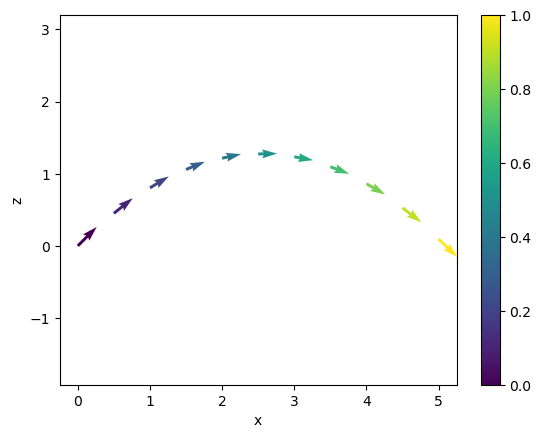

In [53]:
m = 1
g = -9.81
x0 = np.array([[0,0]]).T
v0 = np.array([[5.0,5.0]]).T
F = np.array([[0,m*g]]).T

t = np.linspace(0,1,11)
x = (0.5*F/m*t**2 + v0*t + x0).T
v = (F/m*t + v0).T

fig,ax = plt.subplots()
c = ax.quiver(x[:,0],x[:,1],v[:,0],v[:,1],t)
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.colorbar(c)
plt.axis('equal')

## b)
The numerical solution without drag

In [46]:
m = 1.0
g = -9.81
x0 = 0.0
z0 = 0.0
vx0 = 5.0
vz0 = 5.0
dt = 0.1 #timestep

u0 = np.array([x0, vx0, z0, vz0])
u_record = [u0]
t_record = [0.0]

def F(t, u_k):
    x_change = u_k[1]
    vx_change = 0
    z_change = u_k[3]
    vz_change = g
    return np.array([x_change, vx_change, z_change, vz_change])

t = 0
u_t = u0

while t<t_end:
    # Update solution
    u_next = u_t + dt*F(t,u_t)
    u_t = u_next
    # Update time
    t+=dt
    # Store solutions
    u_record.append(np.copy(u_next))
    t_record.append(t)
    
u_record = np.array(u_record)


(-0.275, 5.775, -0.07642500000000002, 1.6049250000000002)

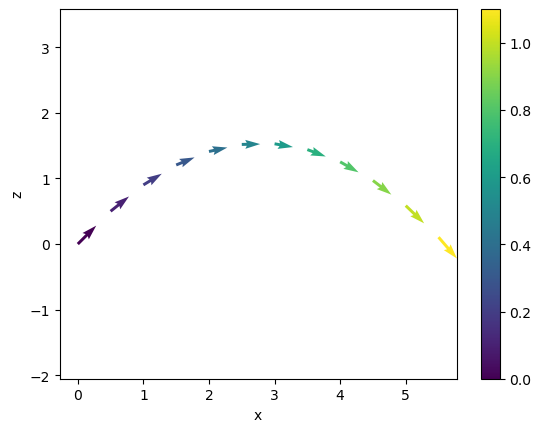

In [51]:
fig,ax = plt.subplots()
c = ax.quiver(u_record[:,0],u_record[:,2],u_record[:,1],u_record[:,3],t_record)
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.colorbar(c)
plt.axis('equal')

## c)
The numerical solution for several different drag coefficients

In [66]:
m = 1.0
g = -9.81
x0 = 0.0
z0 = 0.0
vx0 = 5.0
vz0 = 5.0
dt = 0.1 #timestep
c = 0.5 #drag coefficient

u0 = np.array([x0, vx0, z0, vz0])
u_record = [u0]
t_record = [0.0]

In [67]:
def F(t, u_k):
    x_change = u_k[1]
    z_change = u_k[3]
    vel_vec = np.array([u_k[1], u_k[3]])
    drag = c*np.linalg.norm(vel_vec)*vel_vec
    vx_change = 0 - drag[0]
    vz_change = g - drag[1]
    return np.array([x_change, vx_change, z_change, vz_change])

t = 0
u_t = u0

while t<t_end:
    # Update solution
    u_next = u_t + dt*F(t,u_t)
    u_t = u_next
    # Update time
    t+=dt
    # Store solutions
    u_record.append(np.copy(u_next))
    t_record.append(t)
    
u_record = np.array(u_record)

(-0.1109859133876408,
 2.3307041811404567,
 -1.4415210470049877,
 0.914920018281724)

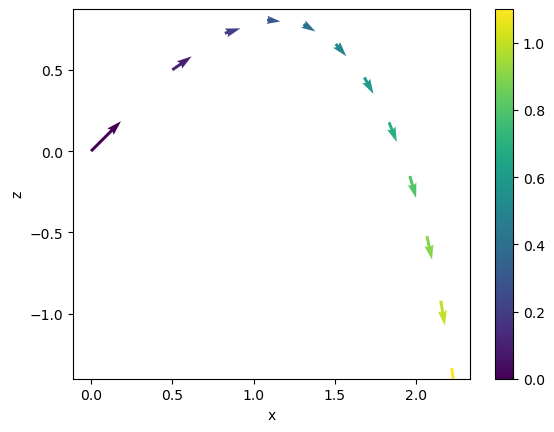

In [68]:
fig,ax = plt.subplots()
c = ax.quiver(u_record[:,0],u_record[:,2],u_record[:,1],u_record[:,3],t_record)
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.colorbar(c)
plt.axis('equal')